<a href="https://colab.research.google.com/github/stchang-idm/nutrition_tb_workshop/blob/main/sample_size_comparison_3arm_vs_2arm_4o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Size Calculation for Superiority Trials Comparing Control, RATIONS, and RATIONS-Plus
* Stewart Chang (stewart.chang@gatesfoundation.org)
* Arie Voorman (arend.voorman@gatesfoundation.org)

## Introduction

In this analysis, we aim to determine the required sample sizes for cluster-randomized superiority trials comparing nutritional interventions to reduce tuberculosis (TB) incidence among household contacts of TB patients. We consider two trial designs:

1. **Three-Arm Trial**: Comparing Control, RATIONS, and RATIONS-Plus.
2. **Two-Arm Trial**: Comparing RATIONS and RATIONS-Plus.

### Trial Arms

1. **Control**: Standard of care with no nutritional intervention.
2. **RATIONS**: A nutritional intervention providing macronutrients and RDA levels of micronutrients.
3. **RATIONS-Plus**: The RATIONS intervention plus additional nutrients thought to provide additional benefits.

We will perform sample size calculations under two scenarios:

1. **Cluster-Level Randomization**: Randomization occurs at the tuberculosis unit (TU) level.
2. **Household-Level Randomization**: Randomization occurs at the household level.

By comparing these scenarios and trial designs, we can assess the impact of the level of randomization and number of arms on the required sample size and study feasibility.

---

## Possible Reservations with a Two-Arm Superiority Design

When considering a two-arm trial design comparing RATIONS to RATIONS-Plus, several reservations arise:

1. **Reproducing RATIONS Results**: Including a Control (untreated) arm would allow the study to reproduce the RATIONS trial results. This is important because the original RATIONS trial was conducted in Jharkhand state, which has a high prevalence of undernourished individuals with BMI < 18.5. Since efficacy appeared higher in normal BMI individuals, it's important to verify if the results hold in different settings.

2. **Changing TB Preventive Therapy Landscape**: With TB preventive therapy (TPT) now scaling up and more individuals becoming eligible per the national policy change in 2021 ("Guidelines for Programmatic Management of Tuberculosis Preventive Treatment in India"), it's uncertain if the RATIONS results would hold in a future trial. Individuals on TPT could be randomized to trial arms which would lower baseline TB incidence—we examine this scenario in sensitivity analysis.

3. **Value of a Control Arm**: A Control arm would be cost-effective and provide valuable information on the effect of secular changes due to TB programme efforts, nutritional status, and other factors. It would also allow for post-hoc and exploratory analyses.

---

## Key Assumptions

- **Significance Level ($\alpha$)**: 0.05 (adjusted using the Bonferroni correction for multiple comparisons).
- **Power ($1 - \beta$)**: 80%.
- **Number of Comparisons**:
  - **Three-Arm Trial**: 2 (Control vs. RATIONS, RATIONS vs. RATIONS-Plus).
  - **Two-Arm Trial**: 1 (RATIONS vs. RATIONS-Plus).
- **Baseline Incidence in Control Group**: 5% over the study period.
- **Efficacy of RATIONS**: 48% reduction in microbiologically confirmed pulmonary TB incidence compared to Control.
- **Additional Efficacy of RATIONS-Plus over RATIONS**: Ranging from 10% to 80%.
- **Average Cluster Size**:
  - **Cluster-Level Randomization**: 5 individuals per household, 100 households per TU.
  - **Household-Level Randomization**: 5 individuals per household.
- **Intra-Cluster Correlation Coefficient (ICC)**:
  - **Within Households ($r$)**: 0.2.
  - **Between Households within TUs ($\rho$)**: 0.01.
- **Design Effect (DE)**: Adjusts for clustering effect due to intra-cluster correlation.

---

## Basic Algorithm

1. **Adjust Significance Level**: Use the Bonferroni correction to adjust $\alpha$ for multiple comparisons.

2. **Calculate Z-Scores**: Determine the critical values corresponding to the adjusted $\alpha$ and desired power.

   - Critical value for significance level (two-sided test):
     $$
     Z_{\alpha} = Z_{1 - \alpha/2}
     $$
   - Critical value for power:
     $$
     Z_{\beta} = Z_{1 - \beta}
     $$

3. **Define Incidence Rates**:

    - Incidence in RATIONS group ($p_1$):
     $$
     p_1 = p_{control} \times \left( 1 - \text{efficacy}_{\text{RATIONS}} \right)
     $$

    - Incidence in RATIONS-Plus group ($p_2$):
     $$
     p_2 = p_{control} \times \left( 1 - \text{efficacy}_{\text{RATIONS-Plus}} \right)
     $$

4. **Calculate Effect Size ($\delta$)**:

   - Absolute difference in incidence rates between groups:
     $$
     \delta = p_1 - p_2
     $$

5. **Compute Sample Size Without Clustering**:

   - Standard formula for comparing two proportions:
     $$
     n = \frac{\left(Z_{\alpha} + Z_{\beta}\right)^2 \times \left[ p_1(1 - p_1) + p_2(1 - p_2) \right]}{\delta^2}
     $$

6. **Adjust for Clustering**:

   - Calculate the design effect (DE):
     $$
     \text{DE} = 1 + (n_e - 1) \times r + n_e \times (n_s - 1) \times \rho
     $$
     Where:
     - $n_e$: Average number of individuals per household (cluster size).
     - $n_s$: Average number of households per TU (for cluster-level randomization).
     - $r$: ICC within households.
     - $\rho$: ICC between households within TUs.

   - Adjusted sample size per group:
     $$
     n_{\text{adjusted}} = n \times \text{DE}
     $$

7. **Determine Total Sample Size and Number of Clusters**:

   - For cluster-level randomization:
     - Total individuals per cluster (TU):
       $$
       m = n_e \times n_s
       $$
     - Number of clusters per group:
       $$
       K = \frac{n_{\text{adjusted}}}{m}
       $$
   - For household-level randomization:
     - Number of households per group:
       $$
       K = \frac{n_{\text{adjusted}}}{n_e}
       $$

8. **Generate 2D Heatmaps**:

   - Vary baseline incidence and additional efficacy to perform sensitivity analysis.
   - Plot the required total sample sizes as a heatmap to visualize the impact of these parameters.

---


## Scenario 1: Cluster-Level Randomization

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
from matplotlib.patches import Rectangle
%matplotlib inline

### Parameters and Constants

In [2]:
# Significance level and power
alpha_total = 0.05  # Total significance level (family-wise error rate)
num_comparisons_three_arm = 2  # Number of primary comparisons in three-arm trial
num_comparisons_two_arm = 1    # Number of primary comparisons in two-arm trial
power = 0.80  # Desired statistical power

# Z-scores corresponding to adjusted alpha and power
# For three-arm trial
alpha_three_arm = alpha_total / num_comparisons_three_arm  # Adjusted alpha using Bonferroni correction
Z_alpha_three_arm = stats.norm.ppf(1 - alpha_three_arm / 2)  # Two-sided test
Z_beta = stats.norm.ppf(power)

# For two-arm trial
alpha_two_arm = alpha_total / num_comparisons_two_arm
Z_alpha_two_arm = stats.norm.ppf(1 - alpha_two_arm / 2)

# Efficacy of RATIONS
efficacy_rations = 0.48  # 48%

# Range of baseline incidence rates (from 3% to 7% in 0.5% increments)
baseline_incidence_percent = np.arange(3, 7.5, 0.5)  # 3% to 7%
baseline_incidences = baseline_incidence_percent / 100  # Convert to proportions

# Range of additional efficacy of RATIONS-Plus over RATIONS (from 10% to 80%)
relative_efficacies_percent = np.arange(10, 90, 10)  # 10% to 80%
relative_efficacies = relative_efficacies_percent / 100  # Convert to proportions

# Baseline scenario parameters
baseline_scenario_incidence = 5 / 100  # 5%
baseline_scenario_rel_efficacy = 50 / 100  # 50%

# Cluster parameters for cluster-level randomization
ne = 5  # Average household size (number of individuals per household)
ns = 100  # Average number of households per tuberculosis unit
r = 0.2  # Intra-cluster correlation coefficient within households
rho = 0.01  # ICC at the tuberculosis unit level

# Design Effect (DE) for cluster-level randomization
DE_cluster = 1 + (ne - 1) * r + ne * (ns - 1) * rho
print(f"Design Effect (Cluster-Level Randomization): {DE_cluster:.2f}")

Design Effect (Cluster-Level Randomization): 6.75


### Sample Size Calculations for Three-Arm Trial

In [3]:
# Initialize a matrix to store total cohort sizes needed for three-arm trial
total_cohort_sizes_three_arm = np.zeros((len(relative_efficacies), len(baseline_incidences)))

for i, rel_eff in enumerate(relative_efficacies):
    # Calculate efficacy of RATIONS-Plus
    efficacy_rations_plus = efficacy_rations + rel_eff * efficacy_rations  # Additional efficacy over RATIONS

    for j, p_control in enumerate(baseline_incidences):
        # Incidence in RATIONS group (p1)
        p1 = p_control * (1 - efficacy_rations)

        # Incidence in RATIONS-Plus group (p2)
        p2 = p_control * (1 - efficacy_rations_plus)

        # Effect size (delta)
        delta = p1 - p2

        # Avoid zero delta to prevent division by zero
        if delta == 0:
            delta = 1e-6

        # Numerator and denominator for sample size formula
        numerator = (Z_alpha_three_arm + Z_beta) ** 2 * (p1 * (1 - p1) + p2 * (1 - p2))
        denominator = delta ** 2

        # Required sample size per group (before clustering)
        n_individuals = numerator / denominator

        # Adjusted sample size per group (after clustering)
        n_individuals_adjusted = n_individuals * DE_cluster

        # Required number of clusters per group
        m = ne * ns  # Total individuals per cluster (TU)
        K = n_individuals_adjusted / m
        K_per_group = math.ceil(K)

        # Total clusters needed (3 groups)
        total_clusters = K_per_group * 3

        # Total household contacts (assuming m contacts per cluster)
        total_household_contacts = total_clusters * m

        # Store total cohort size
        total_cohort_sizes_three_arm[i, j] = total_household_contacts



### Generate the Heatmap for Three-Arm Trial

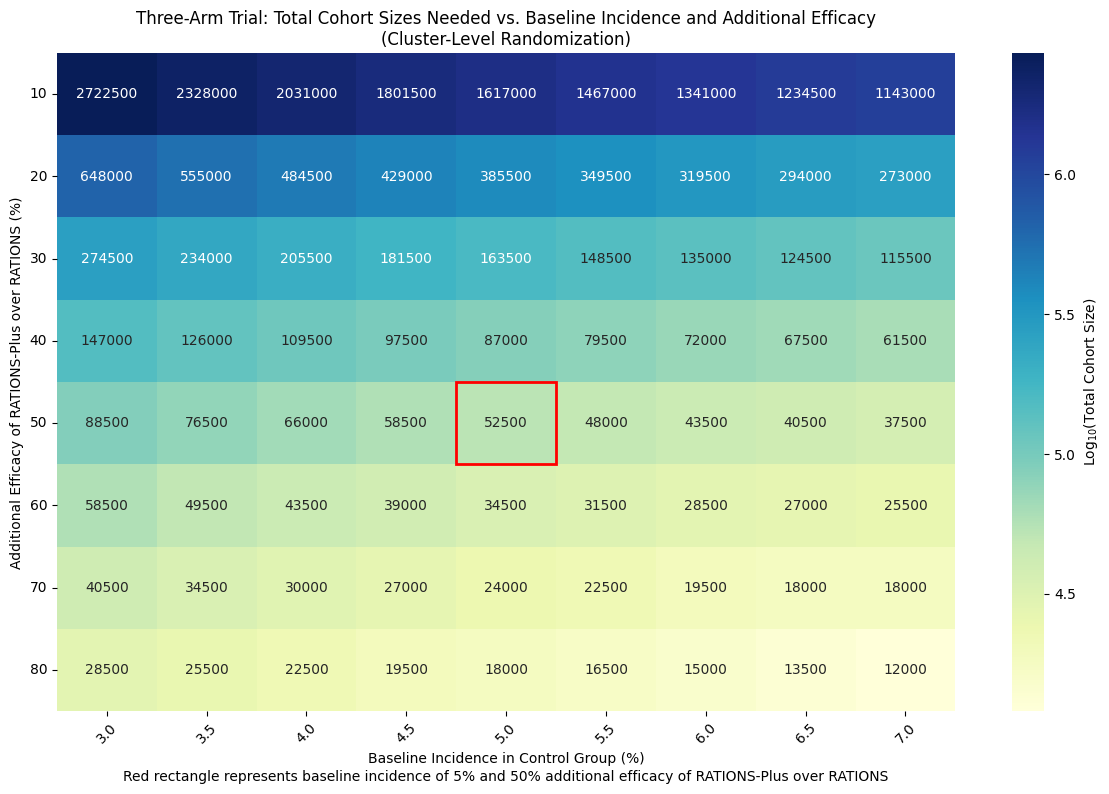

In [4]:
# Apply log10 transformation to accentuate dynamic range
log_total_cohort_sizes_three_arm = np.log10(total_cohort_sizes_three_arm)

# Plotting the heatmap with logarithmic color scaling
plt.figure(figsize=(12, 8))

# Create the heatmap
ax = sns.heatmap(log_total_cohort_sizes_three_arm, annot=total_cohort_sizes_three_arm.astype(int), fmt="", cmap='YlGnBu',
                 xticklabels=baseline_incidence_percent, yticklabels=relative_efficacies_percent,
                 cbar_kws={'label': 'Log$_{10}$(Total Cohort Size)'})

plt.title('Three-Arm Trial: Total Cohort Sizes Needed vs. Baseline Incidence and Additional Efficacy\n(Cluster-Level Randomization)')
plt.xlabel('Baseline Incidence in Control Group (%)')
plt.ylabel('Additional Efficacy of RATIONS-Plus over RATIONS (%)')

# Add note about the red rectangle
plt.text(0.5, -0.1, 'Red rectangle represents baseline incidence of 5% and 50% additional efficacy of RATIONS-Plus over RATIONS',
         ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Adjust tick labels for readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Draw a box around the baseline scenario
baseline_incidence_index = np.where(baseline_incidence_percent == 5)[0][0]
relative_efficacy_index = np.where(relative_efficacies_percent == 50)[0][0]

# Add rectangle to highlight the baseline scenario
rect = Rectangle((baseline_incidence_index, relative_efficacy_index), 1, 1, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

plt.tight_layout()
plt.show()


### Sample Size Calculations for Two-Arm Trial

In [5]:
# Initialize a matrix to store total cohort sizes needed for two-arm trial
total_cohort_sizes_two_arm = np.zeros((len(relative_efficacies), len(baseline_incidences)))

for i, rel_eff in enumerate(relative_efficacies):
    # Calculate efficacy of RATIONS-Plus
    efficacy_rations_plus = efficacy_rations + rel_eff * efficacy_rations  # Additional efficacy over RATIONS

    for j, p_control in enumerate(baseline_incidences):
        # Incidence in RATIONS group (p1)
        p1 = p_control * (1 - efficacy_rations)

        # Incidence in RATIONS-Plus group (p2)
        p2 = p_control * (1 - efficacy_rations_plus)

        # Effect size (delta)
        delta = p1 - p2

        # Avoid zero delta to prevent division by zero
        if delta == 0:
            delta = 1e-6

        # Numerator and denominator for sample size formula
        numerator = (Z_alpha_two_arm + Z_beta) ** 2 * (p1 * (1 - p1) + p2 * (1 - p2))
        denominator = delta ** 2

        # Required sample size per group (before clustering)
        n_individuals = numerator / denominator

        # Adjusted sample size per group (after clustering)
        n_individuals_adjusted = n_individuals * DE_cluster

        # Required number of clusters per group
        m = ne * ns  # Total individuals per cluster (TU)
        K = n_individuals_adjusted / m
        K_per_group = math.ceil(K)

        # Total clusters needed (2 groups)
        total_clusters = K_per_group * 2

        # Total household contacts (assuming m contacts per cluster)
        total_household_contacts = total_clusters * m

        # Store total cohort size
        total_cohort_sizes_two_arm[i, j] = total_household_contacts



### Generate the Heatmap for Two-Arm Trial

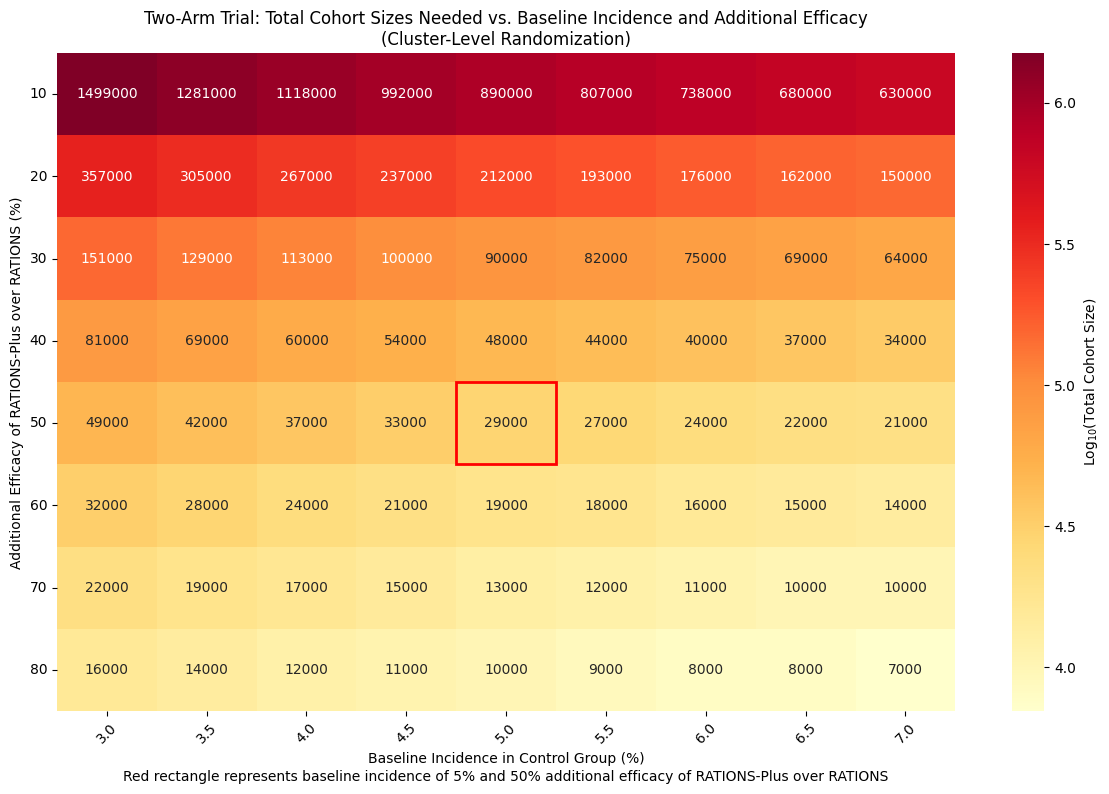

In [6]:
# Apply log10 transformation to accentuate dynamic range
log_total_cohort_sizes_two_arm = np.log10(total_cohort_sizes_two_arm)

# Plotting the heatmap with logarithmic color scaling
plt.figure(figsize=(12, 8))

# Create the heatmap
ax = sns.heatmap(log_total_cohort_sizes_two_arm, annot=total_cohort_sizes_two_arm.astype(int), fmt="", cmap='YlOrRd',
                 xticklabels=baseline_incidence_percent, yticklabels=relative_efficacies_percent,
                 cbar_kws={'label': 'Log$_{10}$(Total Cohort Size)'})

plt.title('Two-Arm Trial: Total Cohort Sizes Needed vs. Baseline Incidence and Additional Efficacy\n(Cluster-Level Randomization)')
plt.xlabel('Baseline Incidence in Control Group (%)')
plt.ylabel('Additional Efficacy of RATIONS-Plus over RATIONS (%)')

# Add note about the red rectangle
plt.text(0.5, -0.1, 'Red rectangle represents baseline incidence of 5% and 50% additional efficacy of RATIONS-Plus over RATIONS',
         ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Adjust tick labels for readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Draw a box around the baseline scenario
baseline_incidence_index = np.where(baseline_incidence_percent == 5)[0][0]
relative_efficacy_index = np.where(relative_efficacies_percent == 50)[0][0]

# Add rectangle to highlight the baseline scenario
rect = Rectangle((baseline_incidence_index, relative_efficacy_index), 1, 1, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

plt.tight_layout()
plt.show()


---

## Scenario 2: Household-Level Randomization

### Parameters and Constants

In [7]:
# Cluster parameters for household-level randomization
m = 5  # Average household size (number of individuals per household)
icc = 0.2  # Intra-cluster correlation coefficient within households

# Design Effect (DE) due to clustering at the household level
DE_household = 1 + (m - 1) * icc
print(f"Design Effect (Household-Level Randomization): {DE_household:.2f}")


Design Effect (Household-Level Randomization): 1.80


### Sample Size Calculations for Three-Arm Trial

In [8]:
# Initialize a matrix to store total individuals needed for three-arm trial
total_individuals_matrix_three_arm = np.zeros((len(relative_efficacies), len(baseline_incidences)))

for i, rel_eff in enumerate(relative_efficacies):
    # Calculate efficacy of RATIONS-Plus
    efficacy_rations_plus = efficacy_rations + rel_eff * efficacy_rations  # Additional efficacy over RATIONS

    for j, p_control in enumerate(baseline_incidences):
        # Incidence in RATIONS group (p1)
        p1 = p_control * (1 - efficacy_rations)

        # Incidence in RATIONS-Plus group (p2)
        p2 = p_control * (1 - efficacy_rations_plus)

        # Effect size (delta)
        delta = p1 - p2

        # Avoid zero delta to prevent division by zero
        if delta == 0:
            delta = 1e-6

        # Numerator and denominator for sample size formula
        numerator = (Z_alpha_three_arm + Z_beta) ** 2 * (p1 * (1 - p1) + p2 * (1 - p2))
        denominator = delta ** 2

        # Required sample size per group (before clustering)
        n_individuals = numerator / denominator

        # Adjusted sample size per group (after clustering)
        n_individuals_adjusted = n_individuals * DE_household

        # Total individuals needed in the study (three groups)
        total_individuals = n_individuals_adjusted * 3

        # Store total individuals needed
        total_individuals_matrix_three_arm[i, j] = total_individuals



### Generate the Heatmap for Three-Arm Trial

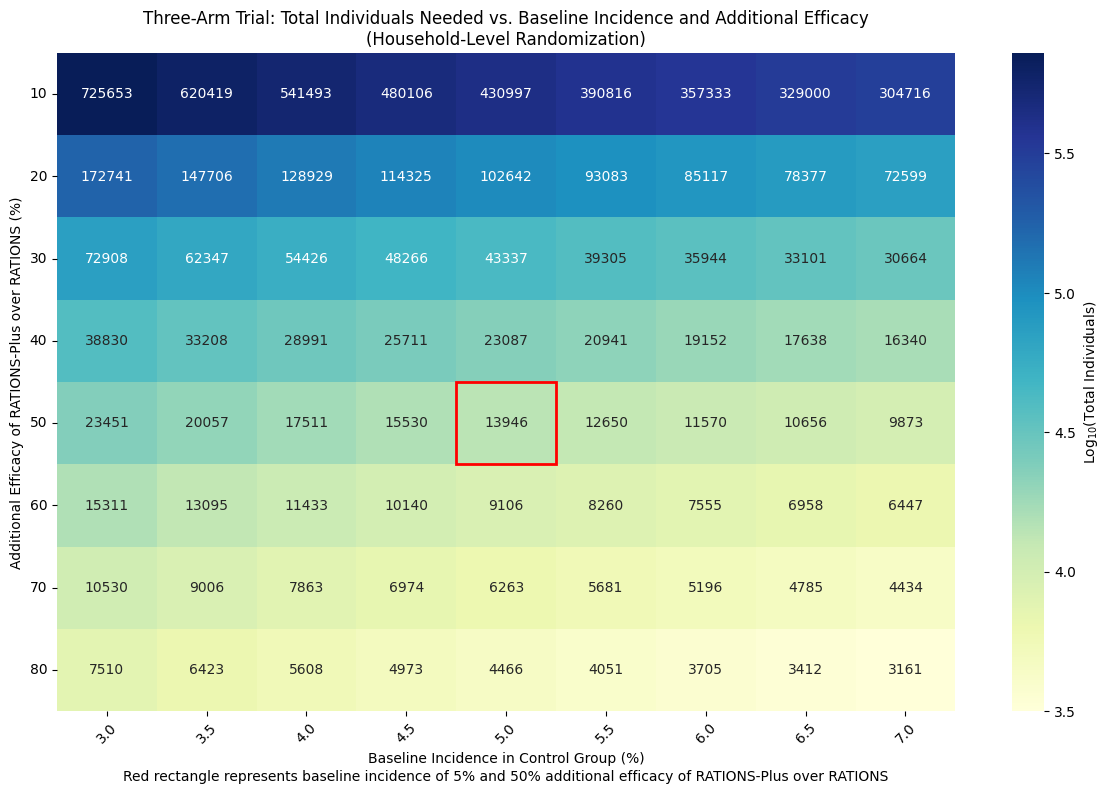

In [9]:
# Apply log10 transformation to accentuate dynamic range
log_total_individuals_three_arm = np.log10(total_individuals_matrix_three_arm)

# Plotting the heatmap with logarithmic color scaling
plt.figure(figsize=(12, 8))

# Create the heatmap
ax = sns.heatmap(log_total_individuals_three_arm, annot=total_individuals_matrix_three_arm.astype(int), fmt="", cmap='YlGnBu',
                 xticklabels=baseline_incidence_percent, yticklabels=relative_efficacies_percent,
                 cbar_kws={'label': 'Log$_{10}$(Total Individuals)'})

plt.title('Three-Arm Trial: Total Individuals Needed vs. Baseline Incidence and Additional Efficacy\n(Household-Level Randomization)')
plt.xlabel('Baseline Incidence in Control Group (%)')
plt.ylabel('Additional Efficacy of RATIONS-Plus over RATIONS (%)')

# Add note about the red rectangle
plt.text(0.5, -0.1, 'Red rectangle represents baseline incidence of 5% and 50% additional efficacy of RATIONS-Plus over RATIONS',
         ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Adjust tick labels for readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Draw a box around the baseline scenario
baseline_incidence_index = np.where(baseline_incidence_percent == 5)[0][0]
relative_efficacy_index = np.where(relative_efficacies_percent == 50)[0][0]

# Add rectangle to highlight the baseline scenario
rect = Rectangle((baseline_incidence_index, relative_efficacy_index), 1, 1, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

plt.tight_layout()
plt.show()


### Sample Size Calculations for Two-Arm Trial

In [10]:
# Initialize a matrix to store total individuals needed for two-arm trial
total_individuals_matrix_two_arm = np.zeros((len(relative_efficacies), len(baseline_incidences)))

for i, rel_eff in enumerate(relative_efficacies):
    # Calculate efficacy of RATIONS-Plus
    efficacy_rations_plus = efficacy_rations + rel_eff * efficacy_rations  # Additional efficacy over RATIONS

    for j, p_control in enumerate(baseline_incidences):
        # Incidence in RATIONS group (p1)
        p1 = p_control * (1 - efficacy_rations)

        # Incidence in RATIONS-Plus group (p2)
        p2 = p_control * (1 - efficacy_rations_plus)

        # Effect size (delta)
        delta = p1 - p2

        # Avoid zero delta to prevent division by zero
        if delta == 0:
            delta = 1e-6

        # Numerator and denominator for sample size formula
        numerator = (Z_alpha_two_arm + Z_beta) ** 2 * (p1 * (1 - p1) + p2 * (1 - p2))
        denominator = delta ** 2

        # Required sample size per group (before clustering)
        n_individuals = numerator / denominator

        # Adjusted sample size per group (after clustering)
        n_individuals_adjusted = n_individuals * DE_household

        # Total individuals needed in the study (two groups)
        total_individuals = n_individuals_adjusted * 2

        # Store total individuals needed
        total_individuals_matrix_two_arm[i, j] = total_individuals



### Generate the Heatmap for Two-Arm Trial

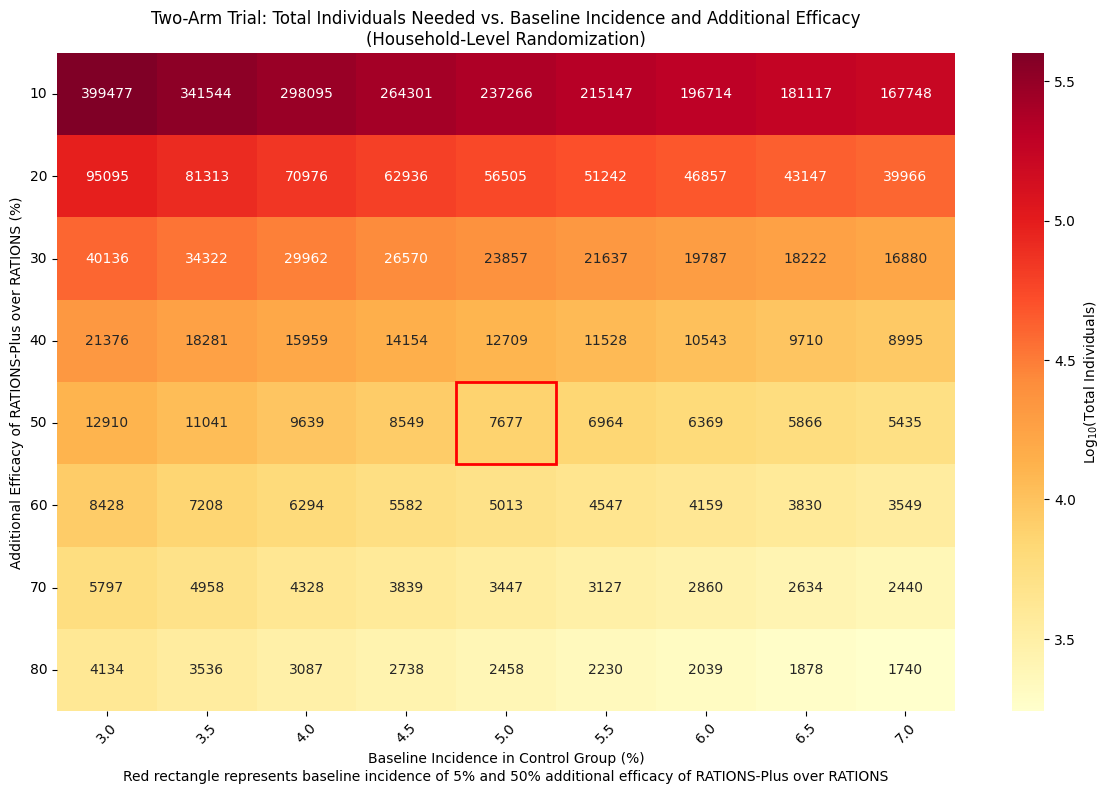

In [11]:
# Apply log10 transformation to accentuate dynamic range
log_total_individuals_two_arm = np.log10(total_individuals_matrix_two_arm)

# Plotting the heatmap with logarithmic color scaling
plt.figure(figsize=(12, 8))

# Create the heatmap
ax = sns.heatmap(log_total_individuals_two_arm, annot=total_individuals_matrix_two_arm.astype(int), fmt="", cmap='YlOrRd',
                 xticklabels=baseline_incidence_percent, yticklabels=relative_efficacies_percent,
                 cbar_kws={'label': 'Log$_{10}$(Total Individuals)'})

plt.title('Two-Arm Trial: Total Individuals Needed vs. Baseline Incidence and Additional Efficacy\n(Household-Level Randomization)')
plt.xlabel('Baseline Incidence in Control Group (%)')
plt.ylabel('Additional Efficacy of RATIONS-Plus over RATIONS (%)')

# Add note about the red rectangle
plt.text(0.5, -0.1, 'Red rectangle represents baseline incidence of 5% and 50% additional efficacy of RATIONS-Plus over RATIONS',
         ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Adjust tick labels for readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Draw a box around the baseline scenario
baseline_incidence_index = np.where(baseline_incidence_percent == 5)[0][0]
relative_efficacy_index = np.where(relative_efficacies_percent == 50)[0][0]

# Add rectangle to highlight the baseline scenario
rect = Rectangle((baseline_incidence_index, relative_efficacy_index), 1, 1, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

plt.tight_layout()
plt.show()


---

## Scenario 3: Using RATIONS Data-Informed ICC Values

Based on the findings from the RATIONS trial (Bhargava et al., 2023), the observed ICC values were lower than initially assumed. We repeat the calculations using these observed ICC values to assess their impact on the required sample sizes.

### Observed Parameters from RATIONS Trial

- **Average Household Size ($n_e$)**: 3.7
- **ICC within Households ($r$)**: 0.0036
- **Average TU Size ($n_s$)**: 368 households
- **ICC at TU Level ($\rho$)**: 0.0018

### Design Effect Calculation

- **Design Effect (DE) for Cluster-Level Randomization**:
  $$
  \text{DE}_{\text{cluster}} = 1 + (n_e - 1) \times r + n_e \times (n_s - 1) \times \rho
  $$

- **Design Effect (DE) for Household-Level Randomization**:
  $$
  \text{DE}_{\text{household}} = 1 + (n_e - 1) \times r
  $$

### Calculate New Design Effects

In [12]:
# Observed parameters
ne_obs = 3.7  # Average household size
r_obs = 0.0036  # ICC within households
ns_obs = 368  # Average number of households per TU
rho_obs = 0.0018  # ICC at TU level

# Design Effect for Cluster-Level Randomization
DE_cluster_obs = 1 + (ne_obs - 1) * r_obs + ne_obs * (ns_obs - 1) * rho_obs
print(f"Design Effect (Cluster-Level) with Observed ICCs: {DE_cluster_obs:.2f}")

# Design Effect for Household-Level Randomization
DE_household_obs = 1 + (ne_obs - 1) * r_obs
print(f"Design Effect (Household-Level) with Observed ICCs: {DE_household_obs:.2f}")


Design Effect (Cluster-Level) with Observed ICCs: 3.45
Design Effect (Household-Level) with Observed ICCs: 1.01


### Sample Size Calculations with Observed ICC Values

In [13]:
# For cluster-level randomization (three-arm trial)
total_cohort_sizes_three_arm_obs = np.zeros((len(relative_efficacies), len(baseline_incidences)))

for i, rel_eff in enumerate(relative_efficacies):
    efficacy_rations_plus = efficacy_rations + rel_eff * efficacy_rations
    for j, p_control in enumerate(baseline_incidences):
        p1 = p_control * (1 - efficacy_rations)
        p2 = p_control * (1 - efficacy_rations_plus)
        delta = p1 - p2
        if delta == 0:
            delta = 1e-6
        numerator = (Z_alpha_three_arm + Z_beta) ** 2 * (p1 * (1 - p1) + p2 * (1 - p2))
        denominator = delta ** 2
        n_individuals = numerator / denominator
        n_individuals_adjusted = n_individuals * DE_cluster_obs
        m_obs = ne_obs * ns_obs
        K = n_individuals_adjusted / m_obs
        K_per_group = math.ceil(K)
        total_clusters = K_per_group * 3
        total_household_contacts = total_clusters * m_obs
        total_cohort_sizes_three_arm_obs[i, j] = total_household_contacts

# For household-level randomization (three-arm trial)
total_individuals_matrix_three_arm_obs = np.zeros((len(relative_efficacies), len(baseline_incidences)))

for i, rel_eff in enumerate(relative_efficacies):
    efficacy_rations_plus = efficacy_rations + rel_eff * efficacy_rations
    for j, p_control in enumerate(baseline_incidences):
        p1 = p_control * (1 - efficacy_rations)
        p2 = p_control * (1 - efficacy_rations_plus)
        delta = p1 - p2
        if delta == 0:
            delta = 1e-6
        numerator = (Z_alpha_three_arm + Z_beta) ** 2 * (p1 * (1 - p1) + p2 * (1 - p2))
        denominator = delta ** 2
        n_individuals = numerator / denominator
        n_individuals_adjusted = n_individuals * DE_household_obs
        total_individuals = n_individuals_adjusted * 3
        total_individuals_matrix_three_arm_obs[i, j] = total_individuals


### Heatmap for Cluster-Level Randomization with Observed ICCs

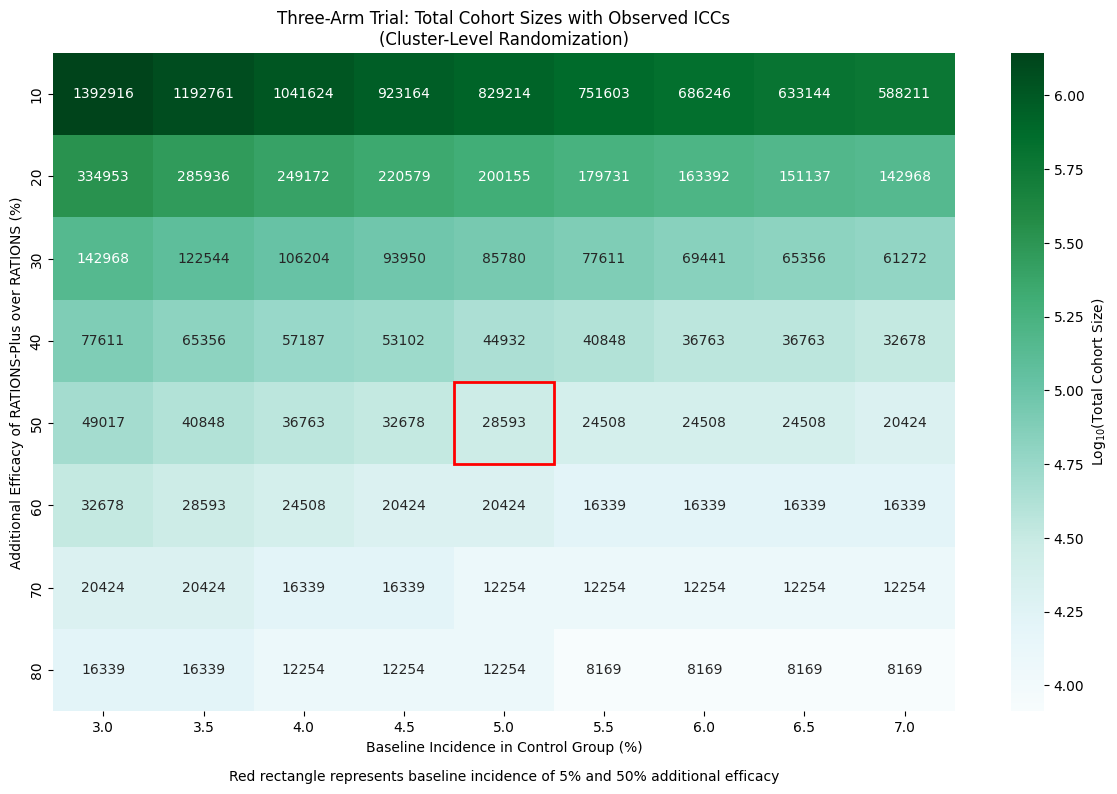

In [14]:
# Apply log10 transformation
log_total_cohort_sizes_three_arm_obs = np.log10(total_cohort_sizes_three_arm_obs)

# Plot heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(log_total_cohort_sizes_three_arm_obs, annot=total_cohort_sizes_three_arm_obs.astype(int), fmt="", cmap='BuGn',
                 xticklabels=baseline_incidence_percent, yticklabels=relative_efficacies_percent,
                 cbar_kws={'label': 'Log$_{10}$(Total Cohort Size)'})

plt.title('Three-Arm Trial: Total Cohort Sizes with Observed ICCs\n(Cluster-Level Randomization)')
plt.xlabel('Baseline Incidence in Control Group (%)')
plt.ylabel('Additional Efficacy of RATIONS-Plus over RATIONS (%)')

# Add note about the red rectangle
plt.text(0.5, -0.1, 'Red rectangle represents baseline incidence of 5% and 50% additional efficacy',
         ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Highlight baseline scenario
baseline_incidence_index = np.where(baseline_incidence_percent == 5)[0][0]
relative_efficacy_index = np.where(relative_efficacies_percent == 50)[0][0]
rect = Rectangle((baseline_incidence_index, relative_efficacy_index), 1, 1, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

plt.tight_layout()
plt.show()


### Heatmap for Household-Level Randomization with Observed ICCs

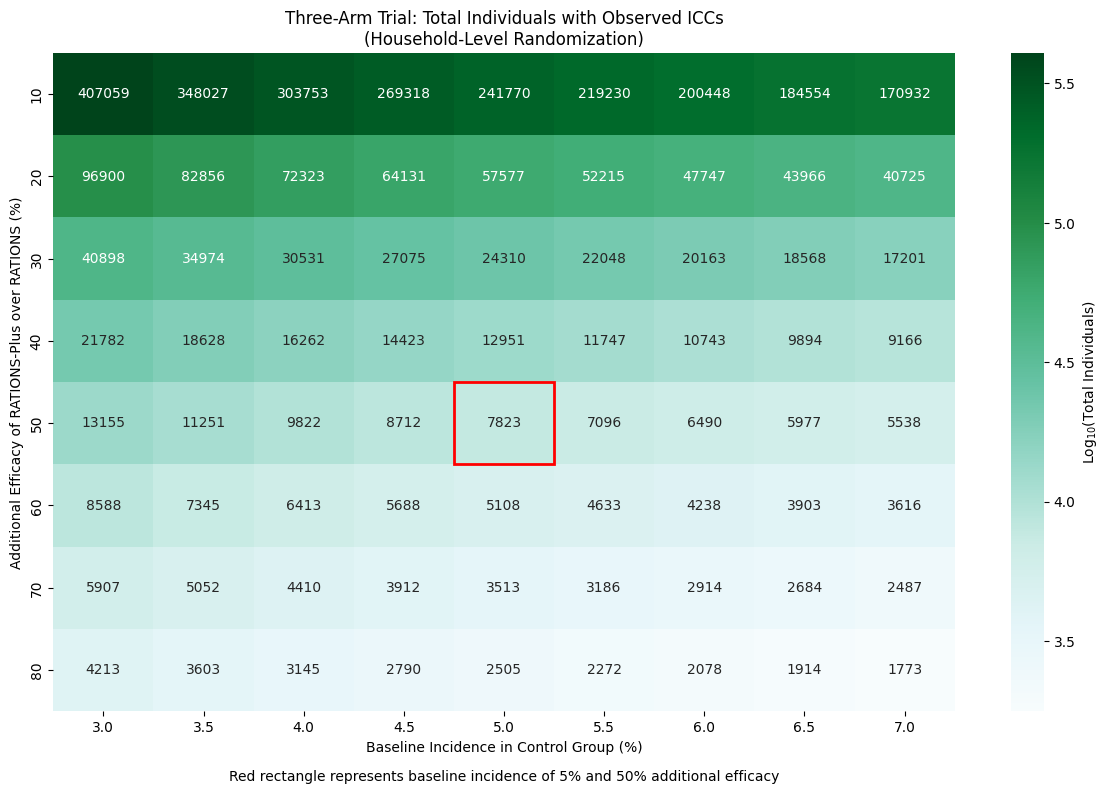

In [15]:
# Apply log10 transformation
log_total_individuals_three_arm_obs = np.log10(total_individuals_matrix_three_arm_obs)

# Plot heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(log_total_individuals_three_arm_obs, annot=total_individuals_matrix_three_arm_obs.astype(int), fmt="", cmap='BuGn',
                 xticklabels=baseline_incidence_percent, yticklabels=relative_efficacies_percent,
                 cbar_kws={'label': 'Log$_{10}$(Total Individuals)'})

plt.title('Three-Arm Trial: Total Individuals with Observed ICCs\n(Household-Level Randomization)')
plt.xlabel('Baseline Incidence in Control Group (%)')
plt.ylabel('Additional Efficacy of RATIONS-Plus over RATIONS (%)')

# Add note about the red rectangle
plt.text(0.5, -0.1, 'Red rectangle represents baseline incidence of 5% and 50% additional efficacy',
         ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Highlight baseline scenario
baseline_incidence_index = np.where(baseline_incidence_percent == 5)[0][0]
relative_efficacy_index = np.where(relative_efficacies_percent == 50)[0][0]
rect = Rectangle((baseline_incidence_index, relative_efficacy_index), 1, 1, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

plt.tight_layout()
plt.show()


---
## Interpretation of Results

### Cluster-Level Randomization

- **Design Effect**: The design effect for cluster-level randomization is calculated to be **6.75**, accounting for clustering at both the tuberculosis unit and household levels.
- **Total Cohort Size**: The required total number of individuals is larger due to the higher design effect from multiple levels of clustering.
- **Heatmap Interpretation**:
  - **Higher Baseline Incidence and Additional Efficacy**: Smaller cohort sizes required.
  - **Lower Baseline Incidence and Additional Efficacy**: Larger cohort sizes required, possibly making the study less feasible. Lower baseline incidence among household contacts could be expected following the 2021 change in policy increasing TPT eligibility.

### Household-Level Randomization

- **Design Effect**: The design effect for household-level randomization is **1.80**, considering clustering within households.
- **Total Individuals Needed**: The required total number of individuals is significantly reduced due to the smaller design effect.
- **Heatmap Interpretation**:
  - **Similar Trends**: Higher baseline incidence and additional efficacy reduce the required sample size.
  - **Feasibility**: Randomization at the household level may make the study more feasible due to reduced sample size requirements.

### Impact of Using Observed ICC Values

- **Reduced Design Effect**: The observed ICC values from the RATIONS trial significantly reduce the design effect:
  - **Cluster-Level DE**: Reduced from 6.75 to approximately **1.66**.
  - **Household-Level DE**: Reduced from 1.80 to approximately **1.01**.
- **Sample Size Requirements**: Lower design effects lead to smaller required sample sizes.
- **Feasibility**: The study becomes more feasible with lower sample size requirements when using observed ICC values.

---

## Conclusion

Randomization at the household level, rather than the cluster level, significantly reduces the required sample size, making the study more feasible. Variations in baseline incidence, assumed efficacy of RATIONS-Plus, and empirical ICC values impact the total sample size needed. Collection of epidemiological data to refine these assumptions and stakeholder discussion on acceptable tradeoffs will be needed.

**Key Takeaways**:

- **Randomization Level**: Randomizing at the household level reduces the design effect and required sample size but increases logistical effort.
- **Study Design Choice**: Inclusion of a Control arm and choice of randomization level should balance feasibility with scientific objectives.
- **Baseline Incidence and Additional Efficacy**: Critical parameters influencing sample size that require additional data; higher values lead to smaller required cohorts.
- **Importance of Accurate ICC Estimates**: ICC values significantly impact sample size calculations and should be estimated carefully from programmatic or survey data.

---

## References

- **Bhargava, A., et al. (2023)**. Nutritional supplementation to prevent tuberculosis incidecnce in household contacts of patients with pulmonary tuberculosis in India (RATIONS): a field-based, open-label, cluster-randomised, controlled trial. *Lancet*, 402, 627-640.
- **Teerenstra, S., Lu, B., Preisser, J. S., van Achterberg, T., & Borm, G. F. (2010)**. Sample size considerations for GEE analyses of three-level cluster randomized trials. *Biometrics*, 66(4), 1230-1237.
- **Hayes, R. J., & Moulton, L. H. (2017)**. *Cluster Randomised Trials*. CRC Press.
- **National TB Elimination Programme (2021)**. *Guidelines for Programmatic Management of Tuberculosis Preventive Treatment in India*.
